# **Project title: Star Type Classification using Machine Learning Models**


This dataset has been taken from kaggle. It contains 3642 records and we are doing binary classification: giant(1) or dwarf(0)



**Step 1:** Importing libraries and uploading the csv file

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
from google.colab import files
files.upload()

Saving big_star_data.csv to big_star_data.csv


{'big_star_data.csv': b'Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass\n5.99,13.73,0.58,1.318,K5III,16.678352,0\n8.7,2.31,1.29,-0.045,B1II,15.51806,0\n5.77,5.5,1.03,0.855,G5III,14.471813,0\n6.72,5.26,0.74,-0.015,B7V,15.324928,1\n8.76,13.44,1.16,0.584,G0V,19.401997,1\n4.9,8.37,0.76,-0.091,B9III,14.513628,0\n8.6,5.09,1.37,0.448,F3V,17.133589,1\n6.24,8.08,1.15,0.68,G0III,15.777057,0\n7.31,1.86,0.87,1.164,K0/K1III,13.657564,0\n9.52,1.28,1.33,1.5,K2III,15.05605,0\n6.18,5.93,0.7,1.467,K4III,15.045273,0\n7.57,8.67,0.84,0.528,F8V,17.260096,1\n7.58,3.47,1.03,1.626,M1III,15.281647,0\n8.27,1.62,0.92,0.146,B7V,14.317575,1\n9.03,0.24,1.28,1.106,K0IVCN...,10.931056,1\n9.79,3.91,2.45,0.711,F8IV/V,17.750885,1\n8.69,1.97,0.85,1.444,K4III,15.162331,0\n9.1,7.46,1.0,0.417,F3V,18.463696,1\n9.26,16.85,1.07,0.831,G6IV/V,20.393,1\n9.72,14.49,1.48,0.845,K0V,20.525341,1\n7.6,5.91,1.04,1.064,G8IV,16.457937,1\n4.83,35.33,0.82,0.421,F5IV,17.570717,1\n8.44,0.55,0.8,1.404,K3III,12.141813,0\n5.96,22.42,0.67,0.419,F5V,17.

**Step 2:** Read the csv file

In [60]:
data= pd.read_csv('/content/big_star_data.csv')

**Step 3: Data Cleaning and formatting**

In [ ]:
#checking for null values
data.isnull().                                                                                                                                          sum()

,0
Vmag,0
Plx,0
e_Plx,0
B-V,0
SpType,0
Amag,0
TargetClass,0


* **Vmag:** Visual Apparent Magnitude of the Star
* **Plx:** Distance Between the Star and the Earth
* **e_Plx:** Standard Error of Plx
* **B-V:** B-V color index. (A hot star has a B-V color index close to 0 or negative, while a cool star has a B-V color
* **SpType:** Spectral type
* **Amag:** Absolute Magnitude of the Star
* **TargetClass:** Whether the Star is Dwarf (0) or Giant (1)






In [62]:
#checking for duplicate rows
data.duplicated().sum()

0

In [63]:
# Checking the class distribution for Target Class (0 is for dwarf stars and 1 is for giant stars)
print(data['TargetClass'].value_counts())

TargetClass
0    1821
1    1821
Name: count, dtype: int64


From the above code, we can confirm that the star type class distribution is perfectly balanced with 1821 instances in each class and is ideal for training.

**Step 3:** Initial data exploration

In [64]:
data.head() #prints first five rows of the data

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
0,5.99,13.73,0.58,1.318,K5III,16.678352,0
1,8.70,2.31,1.29,-0.045,B1II,15.518060,0
2,5.77,5.50,1.03,0.855,G5III,14.471813,0
3,6.72,5.26,0.74,-0.015,B7V,15.324928,1
4,8.76,13.44,1.16,0.584,G0V,19.401997,1


In [65]:
data.tail() #prints last five rows of the data

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
3637,7.29,3.26,0.95,1.786,K4III,14.856089,0
3638,8.29,6.38,1.00,0.408,F2IV/V,17.314104,1
3639,6.11,2.42,0.79,1.664,M0/M1IIICNp,13.029078,0
3640,7.94,4.94,2.90,0.210,A5V,16.408636,1
3641,8.81,1.87,1.23,1.176,K1/K2III,15.169209,0


In [66]:
data.shape  #shape of the data

(3642, 7)

In [67]:
data.info()     #this gives the count of non-null values and their data type along with memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3642 entries, 0 to 3641
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Vmag         3642 non-null   float64
 1   Plx          3642 non-null   float64
 2   e_Plx        3642 non-null   float64
 3   B-V          3642 non-null   float64
 4   SpType       3642 non-null   object 
 5   Amag         3642 non-null   float64
 6   TargetClass  3642 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 199.3+ KB


In [68]:
data.describe()

,Vmag,Plx,e_Plx,B-V,Amag,TargetClass
count,3642.000000,3642.000000,3642.000000,3642.000000,3642.000000,3642.000000
mean,8.120530,7.606153,1.176568,0.827077,16.427388,0.500000
std,1.338875,11.924052,0.919999,0.436699,2.428144,0.500069
min,0.450000,-6.820000,0.470000,-0.196000,2.820000,0.000000
25%,7.370000,2.740000,0.840000,0.487250,15.150312,0.000000
50%,8.390000,4.950000,1.040000,0.867000,16.392485,0.500000
75%,9.060000,8.670000,1.270000,1.136000,18.029836,1.000000
max,12.490000,280.270000,30.290000,2.530000,29.249165,1.000000


**Step 4:** Data preprocessing

In [69]:
#LabelEncoder to convert SpType from categorical to numerical column.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()   #here we are calling the function LabelFunction using variable 'le'
data['SpType'] = le.fit_transform(data['SpType'])     #converting the categorical column to numerical column.
data.head()   #prints first 5 rows of the updated data

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
0,5.99,13.73,0.58,1.318,522,16.678352,0
1,8.70,2.31,1.29,-0.045,99,15.518060,0
2,5.77,5.50,1.03,0.855,337,14.471813,0
3,6.72,5.26,0.74,-0.015,150,15.324928,1
4,8.76,13.44,1.16,0.584,293,19.401997,1


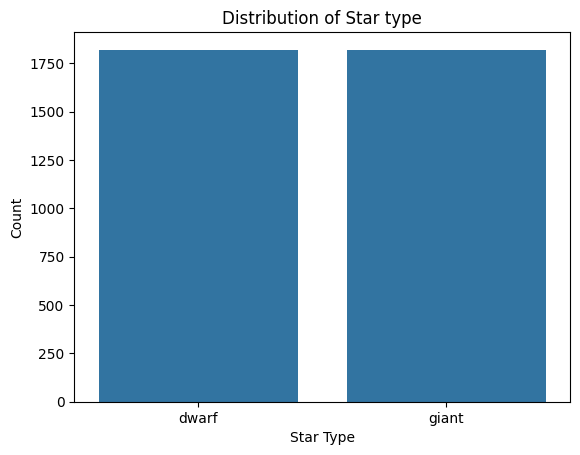

In [70]:
# Distribution of the target variable (Star type)
sns.countplot(x='TargetClass', data=data)   #here we are creating a count plot. it will specify the number of dwarfs and giant stars present in the dataset.
plt.title('Distribution of Star type')      #main title of the plot
plt.xlabel('Star Type')                     #x-axis label
plt.ylabel('Count')                         #y-axis label
plt.xticks([0, 1], ['dwarf', 'giant'])      #labelling class 0 as dwarf and 1 as giant.
plt.show()                                  #displays the plot

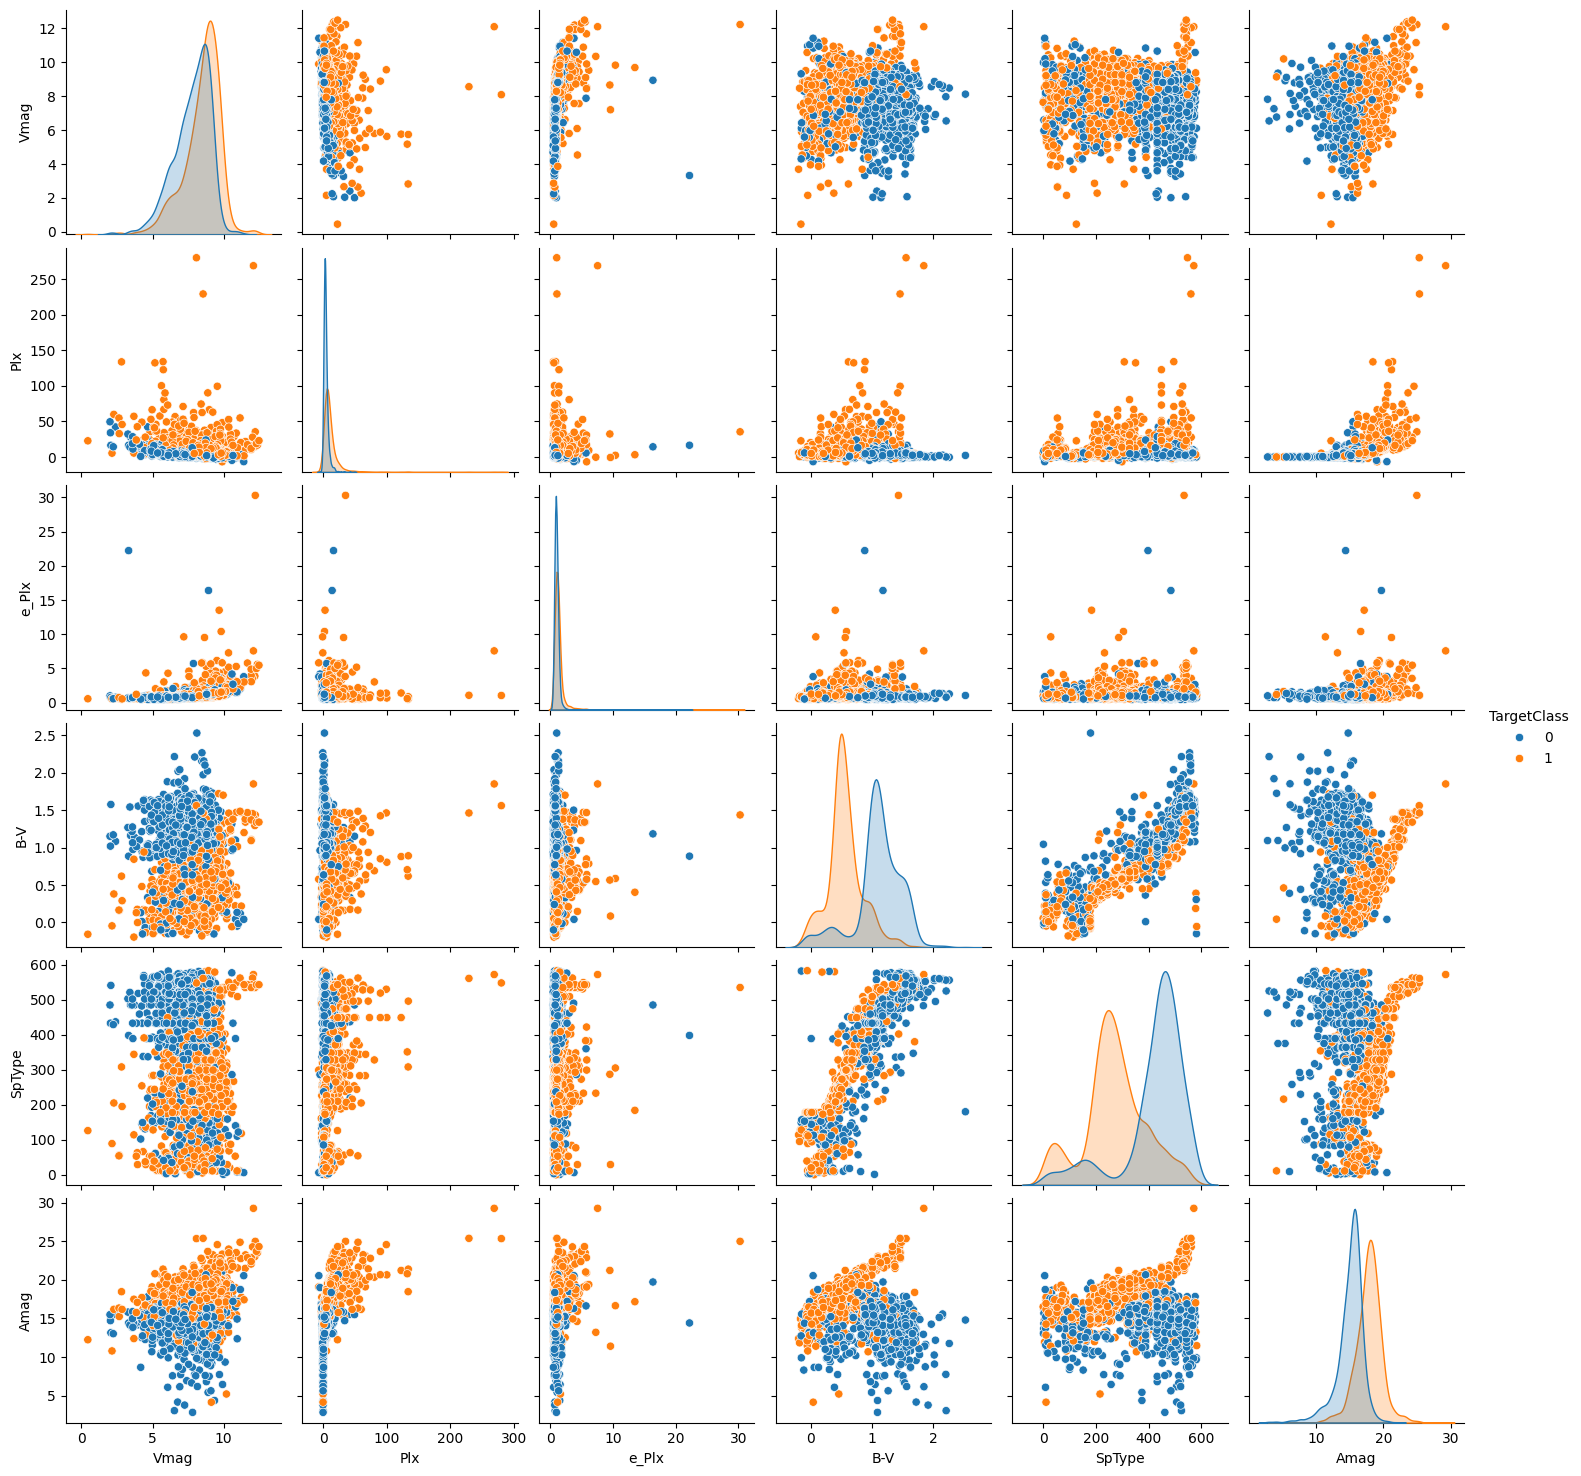

In [71]:
sns.pairplot(data, hue='TargetClass')  #Generating a pairplot. it shows the relation between the numerical values of the dataset with the TargetClass.
plt.show()

In [72]:
data.corr() #This generates a correlation matrix, shwoing linear relation of one variable with another.

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
Vmag,1.000000,-0.169203,0.328024,-0.063602,-0.039259,0.334796,0.264425
Plx,-0.169203,1.000000,0.076106,-0.084149,0.001903,0.505025,0.294217
e_Plx,0.328024,0.076106,1.000000,-0.037010,-0.019177,0.221271,0.165012
B-V,-0.063602,-0.084149,-0.037010,1.000000,0.911339,-0.310483,-0.616440
SpType,-0.039259,0.001903,-0.019177,0.911339,1.000000,-0.154478,-0.528748
Amag,0.334796,0.505025,0.221271,-0.310483,-0.154478,1.000000,0.579413
TargetClass,0.264425,0.294217,0.165012,-0.616440,-0.528748,0.579413,1.000000


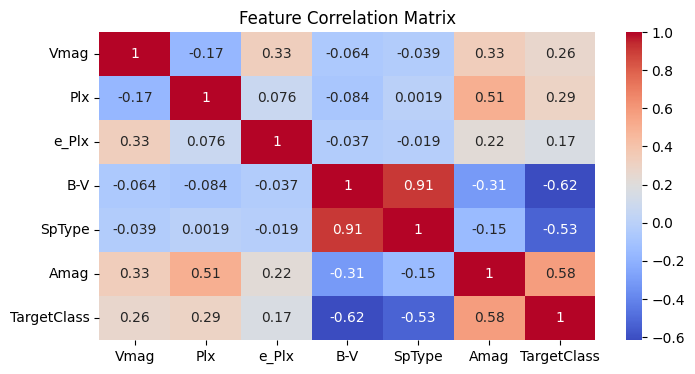

In [73]:
#code to display the above heatmap in a presentable format and better to understand
plt.figure(figsize=(8, 4)) #setting the size of the heatmap
sns.heatmap(data.corr(), annot=True, cmap='coolwarm') #heatmap of the correlation matrix .'annot=true' displays the correlation coefficients on the heatmap cells. 'coolwarm' sets the colormap as cool colours for negative and warm colours for positive.
plt.title('Feature Correlation Matrix') #setting the title
plt.show() #displays the heatmap

In a correlation matrix, the dark coloured boxes means strong correlation whereas, light coloured boxes indicate low or no correlation

In [74]:
# defining features and target variables
X = data.drop('TargetClass', axis=1)  # Features. all except TargetClass are features.
y = data['TargetClass'] # Target

In [75]:
# Performing feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()       #initializing the scaler
X_scaled = scaler.fit_transform(X)    #fitting the scaler to X and transforming it
print(pd.DataFrame(X_scaled, columns=X.columns).head())  #displaying the first 5 rows of the scaled data.

       Vmag       Plx     e_Plx       B-V    SpType      Amag
0 -1.591502  0.513641 -0.648533  1.124323  1.246621  0.103371
1  0.432863 -0.444218  0.123313 -1.997250 -1.749006 -0.374546
2 -1.755841 -0.176655 -0.159335  0.063950 -0.063523 -0.805489
3 -1.046193 -0.196785 -0.474596 -1.928543 -1.387831 -0.454096
4  0.477683  0.489318 -0.018011 -0.556700 -0.375125  1.225223


In [76]:
#splitting the data into training and testing
#also, using k fold cross validation
from sklearn.model_selection import train_test_split, cross_val_score   #importing the required libraries
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=5)    #30% data for testing and hence 70% for testing.
knn = KNeighborsClassifier(n_neighbors=5)   #nearest neigbours set to 5.
cv_scores = cross_val_score(knn, X_train, y_train, cv=5)  #using k fold cross validation; performing 5 fold cross validation of the training data.
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV accuracy: {cv_scores.mean()}")
print(f'Standard Deviation of Cross-Validation Scores: {cv_scores.std()}')

Cross-validation scores: [0.88039216 0.87254902 0.90784314 0.88431373 0.88605108]
Mean CV accuracy: 0.8862298239531569
Standard Deviation of Cross-Validation Scores: 0.011765045337749623


In [77]:
#performing hyperparameter tuning
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': [3, 5, 7, 9, 11, 15, 20],    #different values for number of neighbours
              'weights': ['uniform', 'distance'],         #different weights for the neighbours
              'metric': ['euclidean', 'manhattan', 'minkowski']}  #different distance metrics
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best CV score: {grid_search.best_score_}")

Best parameters: {'metric': 'manhattan', 'n_neighbors': 20, 'weights': 'distance'}
Best CV score: 0.9015270233830271


In [78]:
best_knn = grid_search.best_estimator_   #training the model again with the obtained values
y_pred = best_knn.predict(X_test)

In [79]:
y_scores = best_knn.predict_proba(X_test)[:, 1]  # This gives the probabilities for the positive class (here, giant stars)

In [80]:
#Classification report for training data
from sklearn.metrics import accuracy_score, classification_report  #importing the required libraries
y_train_pred = best_knn.predict(X_train)  #predicting the training data
train_accuracy = accuracy_score(y_train, y_train_pred)  #calculating the accuracy of the model on the training data
print(f"Training set accuracy of the best model: {train_accuracy}")
print("Training Set Classification Report:")
print(classification_report(y_train, y_train_pred))

Training set accuracy of the best model: 1.0
Training Set Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1286
           1       1.00      1.00      1.00      1263

    accuracy                           1.00      2549
   macro avg       1.00      1.00      1.00      2549
weighted avg       1.00      1.00      1.00      2549



In [81]:
#classification report for testing data
y_test_pred = best_knn.predict(X_test)  #predicting the testing data
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test set accuracy of the best model: {test_accuracy}")
print("Test Set Classification Report:")
print(classification_report(y_test, y_test_pred))

Test set accuracy of the best model: 0.9039341262580055
Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.90       535
           1       0.92      0.89      0.90       558

    accuracy                           0.90      1093
   macro avg       0.90      0.90      0.90      1093
weighted avg       0.90      0.90      0.90      1093



In [82]:
#confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[492  43]
 [ 62 496]]


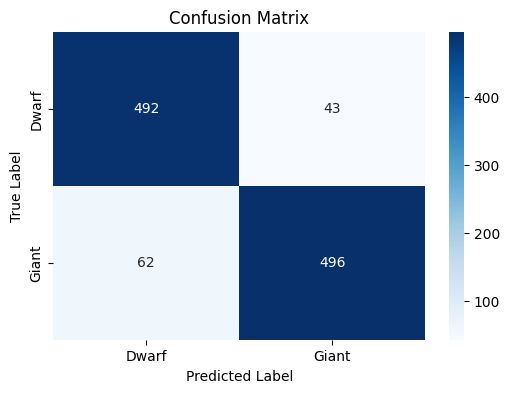

In [83]:
#plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', #annnot=true will add data values to the heatmap. fmt='d' will format the annotation as integers
            xticklabels=['Dwarf', 'Giant'],
            yticklabels=['Dwarf', 'Giant'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [84]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

In [85]:
fpr, tpr, thresholds = roc_curve(y_test, y_scores) #calculating tpr, fpr and threshold value
auc = roc_auc_score(y_test, y_scores)  #calculating auc (area under curve)

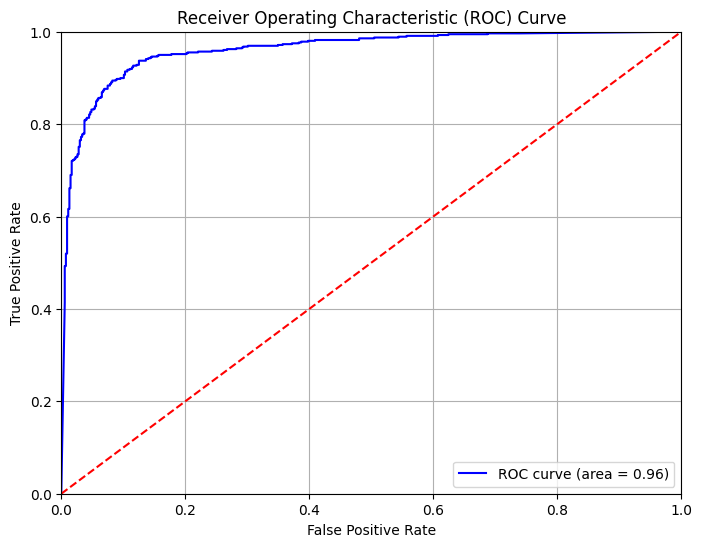

In [86]:
#plotting the ROC AUC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()



# **Star Type Prediction and Classification using SVM**

In [87]:
from sklearn.svm import SVC  #importing support vector classiifier

In [88]:
#cross validation
svm = SVC(probability=True) #this configures svc in such a way that the decision function values can get converted into probabilities.
cv_scores = cross_val_score(svm, X_train, y_train, cv=5) #5 folds
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV accuracy: {cv_scores.mean()}")
print(f"Standard Deviation of Cross-Validation Scores: {cv_scores.std()}")

Cross-validation scores: [0.89411765 0.88627451 0.91568627 0.90196078 0.89390963]
Mean CV accuracy: 0.8983897684810662
Standard Deviation of Cross-Validation Scores: 0.009970190162153135


In [89]:
#hyperparameter tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],    #different values for regularization parameter
    'kernel': ['linear', 'rbf'],       #different kernels
    'gamma': ['scale', 'auto']       #different values for gamma
}

grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train, y_train)
best_svm = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")

# Access cross-validation scores for the best model
best_cv_scores = grid_search.cv_results_['mean_test_score'][grid_search.best_index_]
best_std_dev_cv = grid_search.cv_results_['std_test_score'][grid_search.best_index_]

# Display the results
print(f"Mean cross-validation accuracy of best model: {best_cv_scores}")
print(f"Standard deviation of cross-validation accuracy of best model: {best_std_dev_cv}")

Best parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Mean cross-validation accuracy of best model: 0.8991748526522592
Standard deviation of cross-validation accuracy of best model: 0.007918358701851291


In [40]:
#retrieving the best model with the parameters obtained after hyperparameter tuning
best_svm = grid_search.best_estimator_
y_pred_train = best_svm.predict(X_train)
y_pred_test = best_svm.predict(X_test)

In [41]:
y_scores = best_svm.decision_function(X_test)  #This gives the decision function values for the positive class (here, giant stars)

In [42]:
#classification report for training data
train_accuracy = accuracy_score(y_train, y_pred_train)
print(f"Training set accuracy of the best model: {train_accuracy}")
print("Training Set Classification Report:")
print(classification_report(y_train, y_pred_train))

Training set accuracy of the best model: 0.9105531581012162
Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1286
           1       0.92      0.90      0.91      1263

    accuracy                           0.91      2549
   macro avg       0.91      0.91      0.91      2549
weighted avg       0.91      0.91      0.91      2549



In [43]:
#classification report for testing data
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Test set accuracy of the best model: {test_accuracy}")
print("Test Set Classification Report:")
print(classification_report(y_test, y_pred_test))

Test set accuracy of the best model: 0.9066788655077768
Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       535
           1       0.92      0.90      0.91       558

    accuracy                           0.91      1093
   macro avg       0.91      0.91      0.91      1093
weighted avg       0.91      0.91      0.91      1093



In [44]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[490  45]
 [ 57 501]]


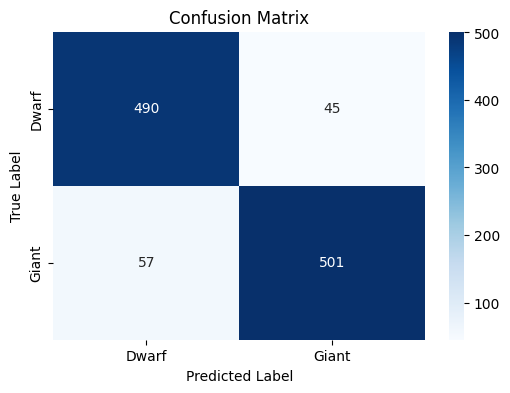

In [45]:
#plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Dwarf', 'Giant'],
            yticklabels=['Dwarf', 'Giant'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [46]:
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
auc = roc_auc_score(y_test, y_scores)

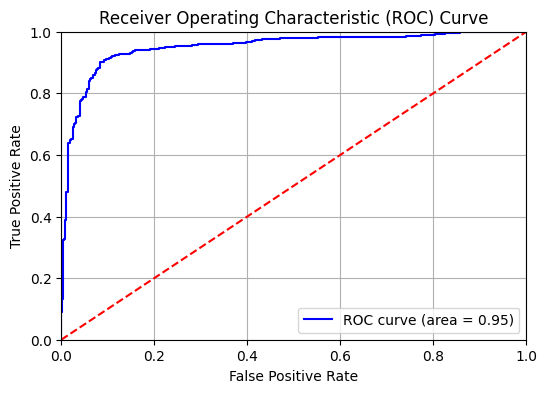

In [47]:
#plotting the roc auc curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


# **Star Type Prediction and Classification using Random Forest**

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
rf = RandomForestClassifier(n_estimators=100, #number of trees in the forest
                            criterion='gini', #gini impurity for making decisions in the tree
                            max_depth=None,
                            min_samples_split=2, #minimum number of samples required to split an internal node
                            min_samples_leaf=1, #minimum number of samples required for being at a leaf node
                            max_features='sqrt', #maximum number of features to consider for best split. here, this value is set to square root of number of features.
                            bootstrap=True,
                            random_state=42)

In [50]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [51]:
#training the model and classificaton report for training data
rf_train_preds = rf.predict(X_train)
print("Random forest training accuracy:", accuracy_score(y_train, rf_train_preds))
print("Random forest training classification report:\n", classification_report(y_train, rf_train_preds))

Random forest training accuracy: 1.0
Random forest training classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1286
           1       1.00      1.00      1.00      1263

    accuracy                           1.00      2549
   macro avg       1.00      1.00      1.00      2549
weighted avg       1.00      1.00      1.00      2549



In [52]:
#testing the model for test data
rf_preds = rf.predict(X_test)

In [53]:
#classification report for test data
print("Random forest testing accuracy: ", accuracy_score(y_test, rf_preds))
print("Random forest classification report:\n", classification_report(y_test, rf_preds))

Random forest testing accuracy:  0.9231473010064044
Random forest classification report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.92       535
           1       0.93      0.92      0.92       558

    accuracy                           0.92      1093
   macro avg       0.92      0.92      0.92      1093
weighted avg       0.92      0.92      0.92      1093



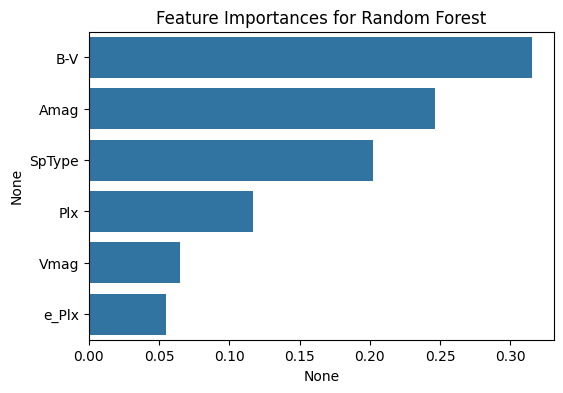

In [54]:
importances = rf.feature_importances_
feature_names = X.columns
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Plotting the feature importances
plt.figure(figsize=(6, 4))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title("Feature Importances for Random Forest")
plt.show()

In [55]:
#confusion matrix
cm = confusion_matrix(y_test, rf_preds)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[496  39]
 [ 45 513]]


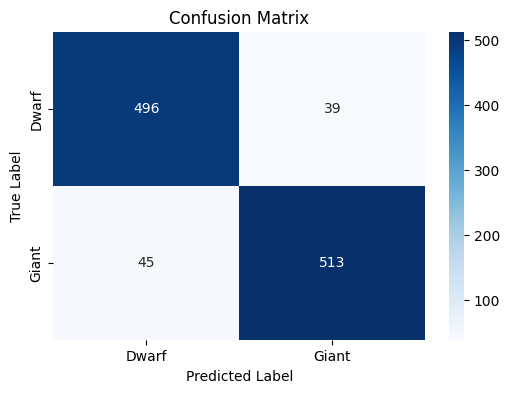

In [56]:
#plotting the confusion matrix for test data
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Dwarf', 'Giant'],
            yticklabels=['Dwarf', 'Giant'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

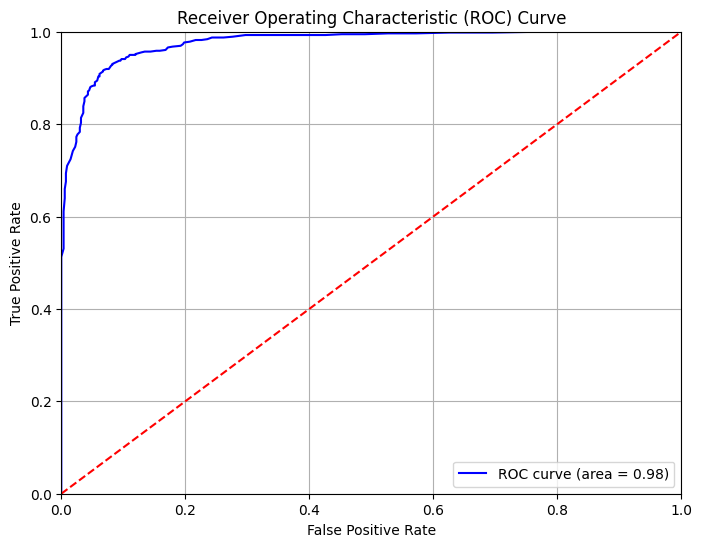

In [57]:
#roc-auc curve
rf_probs = rf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, rf_probs)
roc_auc = roc_auc_score(y_test, rf_probs)

#plotting the curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()